In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Transformador sin carga

Importación y recolección de datos 

In [48]:
data=pd.read_excel('Transformador_sin_carga_datos.xlsx')

In [49]:
data

,Vs,Vp,Vs.1,Vp.1,VsT,Vs.1T,Incertidumbre Vp,Incertidumbre Vs,Incertidumbre Vs.1,Incertidumbre Vp.1
0,139.3,74.9,35.1,94.4,149.8,47.20,1.498,2.786,0.702,1.888
1,126.8,68.3,31.9,86.1,136.6,43.05,1.366,2.536,0.638,1.722
2,117.6,63.4,28.6,77.7,126.8,38.85,1.268,2.352,0.572,1.554
3,105.2,56.9,25.9,70.7,113.8,35.35,1.138,2.104,0.518,1.414
4,94.1,60.1,23.2,63.6,120.2,31.80,1.202,1.882,0.464,1.272
5,85.2,54.5,20.1,55.5,109.0,27.75,1.090,1.704,0.402,1.110
6,72.4,46.5,17.6,40.6,93.0,20.30,0.930,1.448,0.352,0.812
7,61.1,39.3,14.8,34.7,78.6,17.35,0.786,1.222,0.296,0.694
8,50.5,32.8,12.1,31.5,65.6,15.75,0.656,1.010,0.242,0.630
9,39.7,25.9,8.4,22.5,51.8,11.25,0.518,0.794,0.168,0.450


In [50]:
voltaje_primario=data['Vp'][0:9]
voltaje_secundario=data['Vs'][0:9]
incertidumbreVp=data['Incertidumbre Vp'][0:9]
incertidumbreVs=data['Incertidumbre Vs'][0:9]

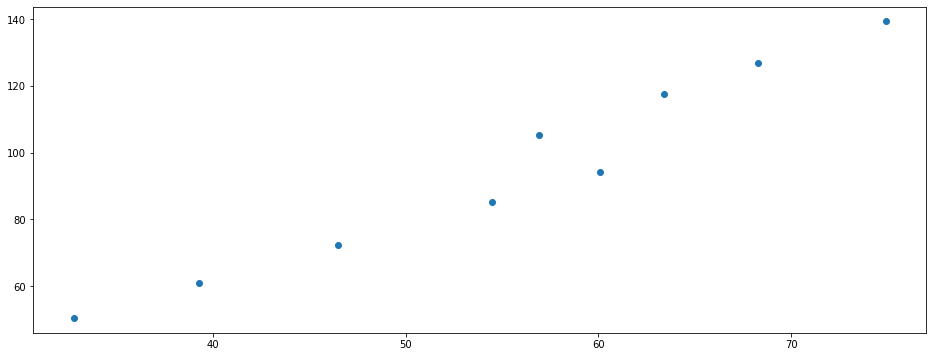

In [51]:
plt.figure(figsize=(16,6))
plt.scatter(voltaje_primario,voltaje_secundario,label='Transformador eléctrico elevador')

Ajuste de una función

In [52]:
def func(x, a, b):
    return a*x+b

param, cov = curve_fit(func, voltaje_primario, voltaje_secundario, sigma=incertidumbreVp, absolute_sigma=True)
print(param)                   #Parametros de ajuste
print(np.sqrt(np.diag(cov))) 

[  2.07753215 -20.12681416]
[0.02539659 1.26925662]


In [53]:
print(np.corrcoef(voltaje_primario,voltaje_secundario))        
R = np.diag(np.corrcoef(voltaje_primario,voltaje_secundario),-1)

[[1.         0.97852746]
 [0.97852746 1.        ]]


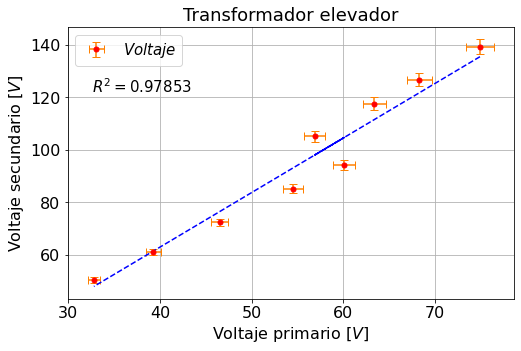

In [54]:
plt.figure(figsize=(8, 5)) 

#Graficamos las barras de error junto con los marcadores de los datos
(_, caps, _) = plt.errorbar(voltaje_primario, voltaje_secundario, xerr=incertidumbreVp , yerr= incertidumbreVs, fmt='o', color='red', markersize=5, capsize=4, ecolor = '#FF8000', label='$Voltaje$')

#Graficamos la función de ajustr
plt.plot(voltaje_primario, func(voltaje_primario, *param), color ='blue', linestyle='--', label='')
plt.legend() #mostrar leyendes de los datos y ajuste

#Ponemos una anotación en la gráfica. Se puede cambiar su pocisión con el patametro xy.
plt.annotate('$R^2 = %.5f$'%R[0], xy=(32, 120),  xycoords='data', xytext=(+5, +5), textcoords='offset points', 
             color= 'black',fontsize=15)

#---------------------------------------------------
##Definimos titulos, tamaño de fuente y de etiquetas
#---------------------------------------------------

#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title('Transformador elevador', fontsize = 18)
plt.legend(fontsize = 15, loc='upper left')

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('Voltaje secundario [$V$]', fontsize = 16)
plt.xlabel('Voltaje primario [$V$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 16)
plt.yticks(size = 16)


plt.grid(True) #mostramos la rejilla de fondo
plt.show() #mostramos todo lo que graficamos


In [55]:
voltaje_primario1=data['Vp.1'][0:9]
voltaje_secundario1=data['Vs.1'][0:9]
incertidumbreVp1=data['Incertidumbre Vp.1'][0:9]
incertidumbreVs1=data['Incertidumbre Vs.1'][0:9]

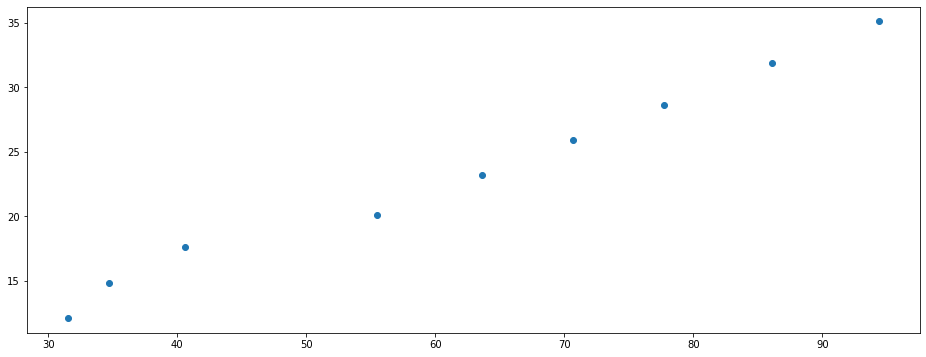

In [56]:
plt.figure(figsize=(16,6))
plt.scatter(voltaje_primario1,voltaje_secundario1,label='Transformador eléctrico reductor')

In [57]:
def func1(x, a, b):
    return a*x +b

param1, cov1 = curve_fit(func1, voltaje_primario1, voltaje_secundario1, sigma=incertidumbreVp1, absolute_sigma=True)
print(param1)                   #Parametros de ajuste
print(np.sqrt(cov1)) 

[0.3384631 2.3885366]
[[0.01818631        nan]
 [       nan 0.90559319]]


C:\Users\DELL\AppData\Local\Temp/ipykernel_7044/3531810658.py:6: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(cov1))


In [58]:
print(np.corrcoef(voltaje_primario1,voltaje_secundario1))        
R1 = np.diag(np.corrcoef(voltaje_primario1,voltaje_secundario1),-1)

[[1.         0.99381622]
 [0.99381622 1.        ]]


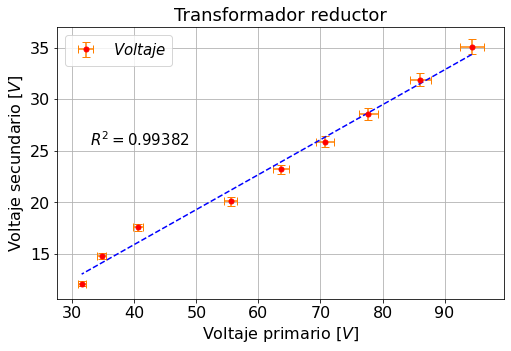

In [59]:
plt.figure(figsize=(8, 5)) 

#Graficamos las barras de error junto con los marcadores de los datos
(_, caps, _) = plt.errorbar(voltaje_primario1, voltaje_secundario1, xerr=incertidumbreVp1 , yerr= incertidumbreVs1, fmt='o', color='red', markersize=5, capsize=4, ecolor = '#FF8000', label='$Voltaje$')

#Graficamos la función de ajustr
plt.plot(voltaje_primario1, func1(voltaje_primario1, *param1), color ='blue', linestyle='--', label='')
plt.legend() #mostrar leyendes de los datos y ajuste

#Ponemos una anotación en la gráfica. Se puede cambiar su pocisión con el patametro xy.
plt.annotate('$R^2 = %.5f$'%R1[0], xy=(32, 25),  xycoords='data', xytext=(+5, +5), textcoords='offset points', 
             color= 'black',fontsize=15)

#---------------------------------------------------
##Definimos titulos, tamaño de fuente y de etiquetas
#---------------------------------------------------

#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title('Transformador reductor', fontsize = 18)
plt.legend(fontsize = 15, loc='upper left')

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('Voltaje secundario [$V$]', fontsize = 16)
plt.xlabel('Voltaje primario [$V$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 16)
plt.yticks(size = 16)


plt.grid(True) #mostramos la rejilla de fondo
plt.show() #mostramos todo lo que graficamos
